In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, export_text
from matplotlib import pyplot as plt
df = pd.read_csv('Admission_Predict.csv')
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()
df.columns

Index(['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor', 'cgpa', 'research', 'chance_of_admit'],
      dtype='object')

In [142]:
# Create a binary class (1=admission likely, 0- admiission unlikely)
# from 'chance_of_admit >= .8'
# remaining columns are predictors/labels
x = df.loc[:,'gre_score':'research']
y = df['chance_of_admit'] >= 0.8

In [143]:
x

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [144]:
y

0       True
1      False
2      False
3       True
4      False
       ...  
395     True
396     True
397     True
398    False
399     True
Name: chance_of_admit, Length: 400, dtype: bool

In [145]:
# split our data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [146]:
compare_training = pd.DataFrame(x_train)
compare_training['chance_of_admit'] = y_train
compare_training

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
336,319,110,3,3.0,2.5,8.79,0,False
64,325,111,3,3.0,3.5,8.70,0,False
55,320,103,3,3.0,3.0,7.70,0,False
106,329,111,4,4.5,4.5,9.18,1,True
300,309,106,2,2.5,2.5,8.00,0,False
...,...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0,False
192,322,114,5,4.5,4.0,8.94,1,True
117,290,104,4,2.0,2.5,7.46,0,False
47,339,119,5,4.5,4.0,9.70,0,True


In [147]:
compare_test = pd.DataFrame(x_test)
compare_test['chance_of_admit'] = y_test
compare_test

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
132,309,105,5,3.5,3.5,8.56,0,False
309,308,110,4,3.5,3.0,8.60,0,False
341,326,110,3,3.5,3.5,8.76,1,False
196,306,105,2,3.0,2.5,8.26,0,False
246,316,105,3,3.0,3.5,8.73,0,False
...,...,...,...,...,...,...,...,...
14,311,104,3,3.5,2.0,8.20,1,False
363,306,103,2,2.5,3.0,8.36,0,False
304,313,106,2,2.5,2.0,8.43,0,False
361,334,116,4,4.0,3.5,9.54,1,True


In [148]:
# Create DT Classifier
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01, criterion='gini')
dt

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=2)

In [149]:
# Fit it
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=2)

In [150]:
# Predict outcome based on test data
y_predict = dt.predict(x_test)
y_predict

array([False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False])

In [151]:
# Check Score
dt.score(x_test, y_test)

1.0

In [152]:
# Get Accuracy Score
accuracy_score(y_test, y_predict)

1.0

[Text(0.5, 0.75, 'chance_of_admit <= 0.5\ngini = 0.443\nsamples = 320\nvalue = [214, 106]\nclass = unlikely admit'),
 Text(0.25, 0.25, '0.0\n214\n[214, 0]\nunlikely admit'),
 Text(0.75, 0.25, '0.0\n106\n[0, 106]\nlikely admit')]

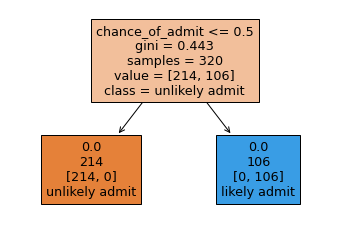

In [153]:
# Plot that fucker
plot_tree(dt, feature_names=x_train.columns, max_depth=3, class_names = ['unlikely admit', 'likely admit'], label='root', filled=True)


In [154]:
print(export_text(dt, feature_names= x.columns.tolist()))

ValueError: feature_names must contain 8 elements, got 7

In [ ]:
# Create a function to caldulate the Gini IMpurity Score
def gini(data):
    ''' Calculate Gini Impurity Score '''
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

In [ ]:
# Create a function to calculate the information gain
def info_gain(left, right, current_impurity):
    '''
        Information Gain associated w/ creating a node split data
        
        Input: 
            left, right are the data in the left and right branches repsectively
            current_impurity is the data impurity before splitting into the left and right branches
    '''
    
    # Calculate weight for gini score of the left branch
    left_weight = float(len(left)) / (len(left) + len(right))
    return current_impurity - left_weight * gini(left) - (1 - left_weight) * gini(right)

In [ ]:
gi = gini(y_train)
'Gini impurity at root', round(gi, 3)

In [ ]:
# Determine info gain to determine how the split for the dt was determined (i.e. that first gini value of 8.845)
info_gain_list = []
for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa <= i]
    right = y_train[x_train.cgpa > i]
    info_gain_list.append([i, info_gain(left, right, gi)])
info_gain_list

In [ ]:
ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain', ascending=False)

In [ ]:
ig_table

In [ ]:
ig_table.head(10)

In [ ]:
plt.plot(ig_table['split_value'], ig_table['info_gain'], 'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0], 'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')
plt.show()

In [ ]:
## REGRESSION
# x value doesn't change. 
# y value/predictor changes from a classification value to the actual values.
y_regr = df['chance_of_admit']

In [ ]:
# Compare the use of 'chance_of_admit' between Classification and Regression.
# - to the right we have the actual values (which are used for Regression)
# - to the right we have predictive values based on the condition used in the earlier Classification step
compare_y = pd.DataFrame(list(zip(y, y_regr)), columns=['Classification', 'Regression'])
compare_y

In [ ]:
# split the data
feat_x_train, feat_x_test, vald_y_train, vald_y_test = train_test_split(x, y_regr, random_state=0, test_size=0.2)

In [ ]:
# Compare Training Data
compare_training_regr = pd.DataFrame(feat_x_train)
compare_training_regr['chance_of_admit'] = vald_y_train
compare_training_regr

In [ ]:
# Compare the test data
compare_test_regr = pd.DataFrame(feat_x_test)
compare_test_regr['chance_of_admit'] = vald_y_test
compare_test_regr

In [ ]:
# Create the Tree for a REGRESSION
dtr = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dtr

In [ ]:
dtr.fit(feat_x_train, vald_y_train)

In [ ]:
# Create Prediction based on the test set
y_predict_regr = dtr.predict(feat_x_test)
y_predict_regr

In [ ]:
# Score
# (Accuracy Score isn't supported on continuous values, so it only supports Classification, not Regression)
dtr.score(feat_x_test, vald_y_test)

In [ ]:
# Plot that shit out
plt.figure(figsize=(10,10))
plot_tree(dtr, feature_names=feat_x_train.columns, max_depth=2, filled=True)

In [ ]:
'''
    Regression isn't splitting up the tree in the manner we were previously. 
    Above, each level, the value represents the average of all samples that fit th elogical criteria. 
    
    The default method for evaluating splits is called MSE (mean squared error)
'''

In [157]:
#MSE Code
def mse(data):
    ''' Calculate MSE of a data set'''
    return np.mean((data - data.mean())**2)

# MSE Information Gain
def mse_gain(left, right, current_mse):
    ''' Info Gain (MSE) associated with creating a node/split data based on MSE
        
        INPUT:
            - left/right are the data sets in the left and right branches respectively
            - current_impurity is the data impurity before splitting into those branches
    '''
    left_weight = float(len(left)) / (len(left) + len(right))
    return current_mse - left_weight * mse(left) - (1 - left_weight) * mse(right)

In [159]:
# Validate the information gain / loss for mse
m_calculated= mse(vald_y_train)
'MSE at root', round(m_calculated, 3)

('MSE at root', 0.021)

In [161]:
# Calc the mse_gain_list
mse_gain_list = []
for i in feat_x_train.cgpa.unique():
    left = y_train[x_train.cgpa <= i]
    right = y_train[x_train.cgpa > i]
    mse_gain_list.append([i, mse_gain(left, right, m_calculated)])
mse_gain_list

[[8.79, -0.06547630131145951],
 [8.7, -0.08767596222760793],
 [7.7, -0.19062235920501702],
 [9.18, -0.1058674401337593],
 [8.0, -0.17895275252735832],
 [9.01, -0.06415255819075977],
 [8.36, -0.1416501470102165],
 [8.54, -0.10895900685180568],
 [9.04, -0.06862711160635485],
 [9.14, -0.09624478395833087],
 [8.84, -0.05226760247142169],
 [9.68, -0.18179574805005594],
 [7.4, -0.19827973198195392],
 [9.16, -0.09752755085637087],
 [8.48, -0.1242039869078065],
 [8.77, -0.07472760728440417],
 [8.24, -0.1564580501816063],
 [8.76, -0.07123487088456665],
 [8.9, -0.055706644049998026],
 [8.57, -0.10036018062497565],
 [8.5, -0.11796252138427718],
 [9.0, -0.05905161013826686],
 [7.9, -0.18415628632953035],
 [8.46, -0.1271752657301489],
 [9.5, -0.16609997380379332],
 [8.04, -0.17489074509456376],
 [8.75, -0.08373282971064308],
 [8.67, -0.08864048306305254],
 [8.4, -0.13834014512484655],
 [9.17, -0.10172932713352792],
 [9.26, -0.12565184900347803],
 [9.34, -0.13501221449022832],
 [8.37, -0.14083463929

In [163]:
mse_table = pd.DataFrame(mse_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain', ascending=False)
mse_table

,split_value,info_gain
10,8.84,-0.052268
124,8.85,-0.055002
139,8.88,-0.055381
18,8.90,-0.055707
98,8.83,-0.056829
...,...,...
74,7.30,-0.199345
105,7.28,-0.199695
134,7.20,-0.200044
117,6.80,-0.200390


In [164]:
mse_table.head(10)

,split_value,info_gain
10,8.84,-0.052268
124,8.85,-0.055002
139,8.88,-0.055381
18,8.90,-0.055707
98,8.83,-0.056829
110,8.87,-0.057709
152,8.94,-0.058377
57,8.96,-0.058629
96,8.80,-0.059048
21,9.00,-0.059052


Text(0, 0.5, 'info gain')

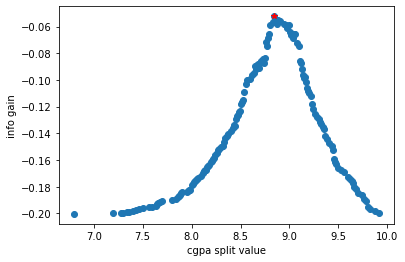

In [165]:
plt.plot(mse_table['split_value'], mse_table['info_gain'],'o')
plt.plot(mse_table['split_value'].iloc[0], mse_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')